In [1]:
import tensorflow as tf
from tensorflow import keras
print("Number of GPUS : ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()

Number of GPUS :  1


True

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from PIL import Image
from tqdm import tqdm

In [3]:
import glob
import cv2

In [4]:

x_train = []
y_train = []
x_test = []
y_test = []
# val=[]


for images in tqdm(glob.iglob(f'../trainingdata/*')):
    print(images)
    break
    label = fun(images)
    x_train.append(cv2.imread(images, 0))
    y_train.append(label)

0it [00:00, ?it/s]

../trainingdata\normal


In [5]:
vgg = VGG16(input_shape=[224, 224] + [3], weights='imagenet', include_top=False)

In [6]:
for layer in vgg.layers:
    layer.trainable = False

In [7]:
x = Flatten()(vgg.output)

In [8]:
folders = glob.glob('../over/*')

In [9]:
print(len(folders))

2


In [10]:
from keras.layers import Conv2D, Dropout

In [11]:
model = Sequential()

for layer in vgg.layers:
    model.add(layer)
    

model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='additional_layer') )
model.add(Flatten())
model.add(Dense(2, activation='softmax', name='predictions'))

In [12]:
es=EarlyStopping(
    monitor='val_accuracy',
    patience=30,
    verbose=1,
    mode=min
)

In [45]:
# prediction = Dense(len(folders), activation='softmax')(x)

# model = Model(vgg.inputs, output='predictions')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
optimizer = keras.optimizers.Adam(lr=0.00001)

c:\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
train_path = '../over'
test_path = '../dataset/chest_xray/test'

In [18]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7750 images belonging to 2 classes.


In [19]:
training_set.class_indices

{'normal': 0, 'pneumonia': 1}

In [20]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [21]:
r = model.fit(training_set,validation_data=test_set,epochs=80,steps_per_epoch=len(training_set),validation_steps=len(test_set),callbacks=[es])

Epoch 1/80
243/243 [==============================] - 234s 919ms/step - loss: 0.5244 - accuracy: 0.7599 - val_loss: 0.4503 - val_accuracy: 0.8189
Epoch 2/80
243/243 [==============================] - 106s 436ms/step - loss: 0.3299 - accuracy: 0.8866 - val_loss: 0.3579 - val_accuracy: 0.8590
Epoch 3/80
243/243 [==============================] - 106s 434ms/step - loss: 0.2578 - accuracy: 0.9081 - val_loss: 0.3254 - val_accuracy: 0.8606
Epoch 4/80
243/243 [==============================] - 112s 460ms/step - loss: 0.2264 - accuracy: 0.9152 - val_loss: 0.3014 - val_accuracy: 0.8718
Epoch 5/80
243/243 [==============================] - 112s 461ms/step - loss: 0.2030 - accuracy: 0.9249 - val_loss: 0.2863 - val_accuracy: 0.8798
Epoch 6/80
243/243 [==============================] - 116s 477ms/step - loss: 0.1913 - accuracy: 0.9294 - val_loss: 0.2733 - val_accuracy: 0.8894
Epoch 7/80
243/243 [==============================] - 121s 497ms/step - loss: 0.1791 - accuracy: 0.9368 - val_loss: 0.2647 -

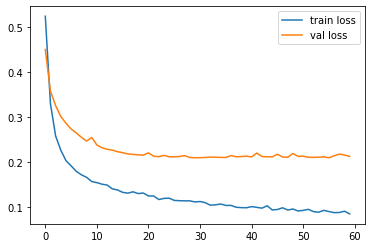

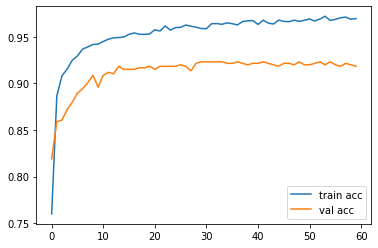

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']